# Clustering Assignment

#Expected Result : Final list of the countries which required help

Steps:

1.Read and understand the data 

2.Clean the data 

3.Prepare the data for modelling

4.Modelling

5.Final analysis and report which countries required aid


In [1]:
# import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [2]:
# Read the Data

df_countries=pd.read_csv(r'C:\Users\esusvem\Downloads\Clustering_Assignment\Country-data.csv')
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Inspecting the data frame
df_countries.shape

(167, 10)

In [4]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Clean the data if required

In [5]:
# missing values
round(100*(df_countries.isnull().sum())/len(df_countries), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
#From the data frame observed that the columns exports,health imports are in the percentage where as 
#the corresponding gdp is in actual values.
#Hence converting these columns into the actual values

df_countries['exports']=pd.to_numeric(df_countries['exports'])/100
df_countries['health']= pd.to_numeric(df_countries['health'])/100
df_countries['imports']=pd.to_numeric(df_countries['imports'])/100

df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,0.100,0.0758,0.449,1610,9.44,56.2,5.82,553
1,Albania,16.6,0.280,0.0655,0.486,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,0.384,0.0417,0.314,12900,16.10,76.5,2.89,4460
3,Angola,119.0,0.623,0.0285,0.429,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,0.455,0.0603,0.589,19100,1.44,76.8,2.13,12200


# EDA

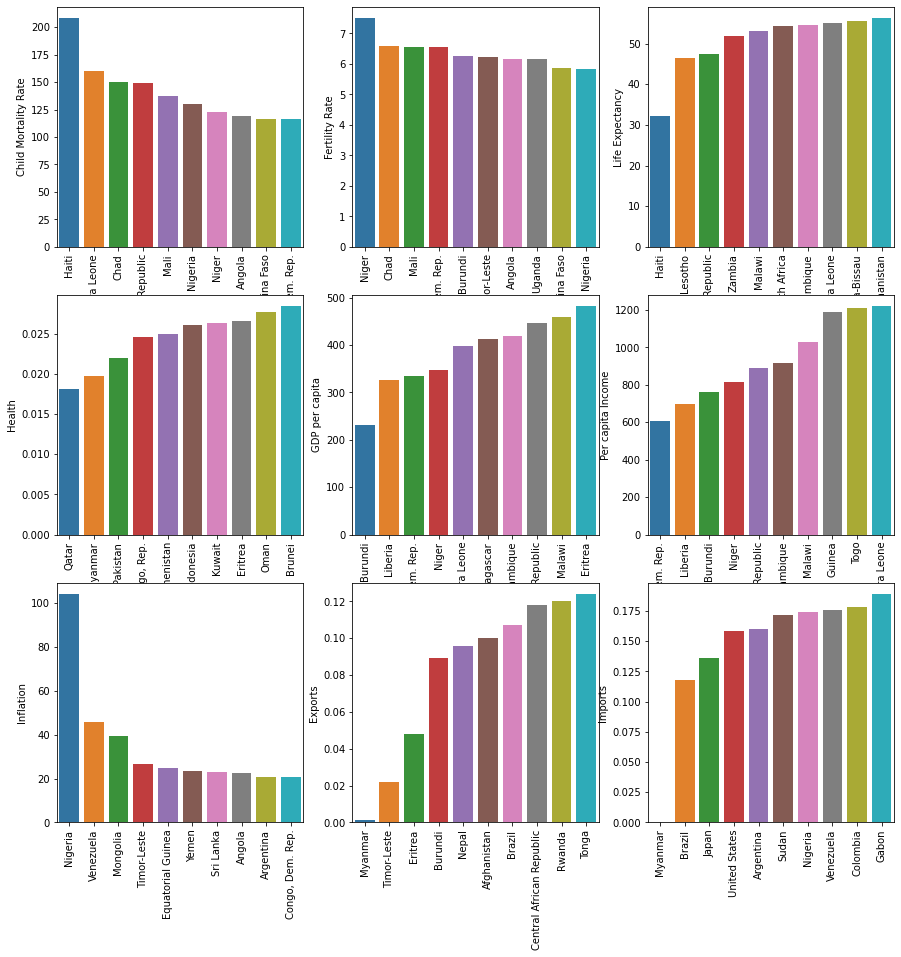

In [8]:
# Bi-Vraiate Analysis

fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = df_countries[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = df_countries[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = df_countries[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = df_countries[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = df_countries[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = df_countries[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = df_countries[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: 

bottom10_exports = df_countries[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: 

bottom10_imports = df_countries[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)  

plt.show()

#As per above observations from the plotting we can see that child Mortality rate is high in Haiti followed by Leone,chad etc
And GDP i slow in Burundi follwed by Liberia, Rep etc. 
Also we can say that income is less in Rep, Liberia etc.
For all the columns the analysis has been performed however as per businesss case study the following columns Income,GDP, Child  Mortality rate are considered for observations as these are major factors deciding the aid required for countries.

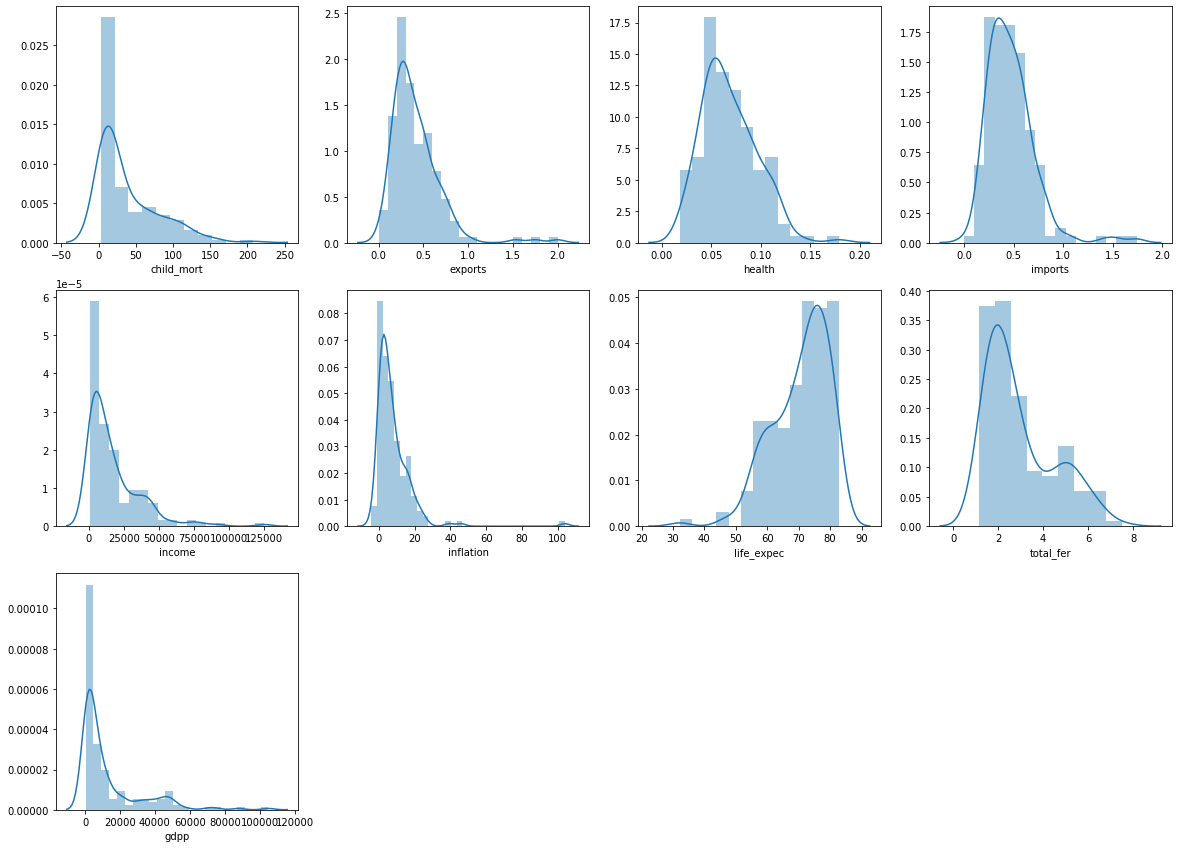

In [9]:
#Uni-Variate Analysis

plt.figure(figsize = (20,20))
feature = df_countries.columns[1:]
for i in enumerate(feature):
    plt.subplot(4,4, i[0]+1)
    sns.distplot(df_countries[i[1]])


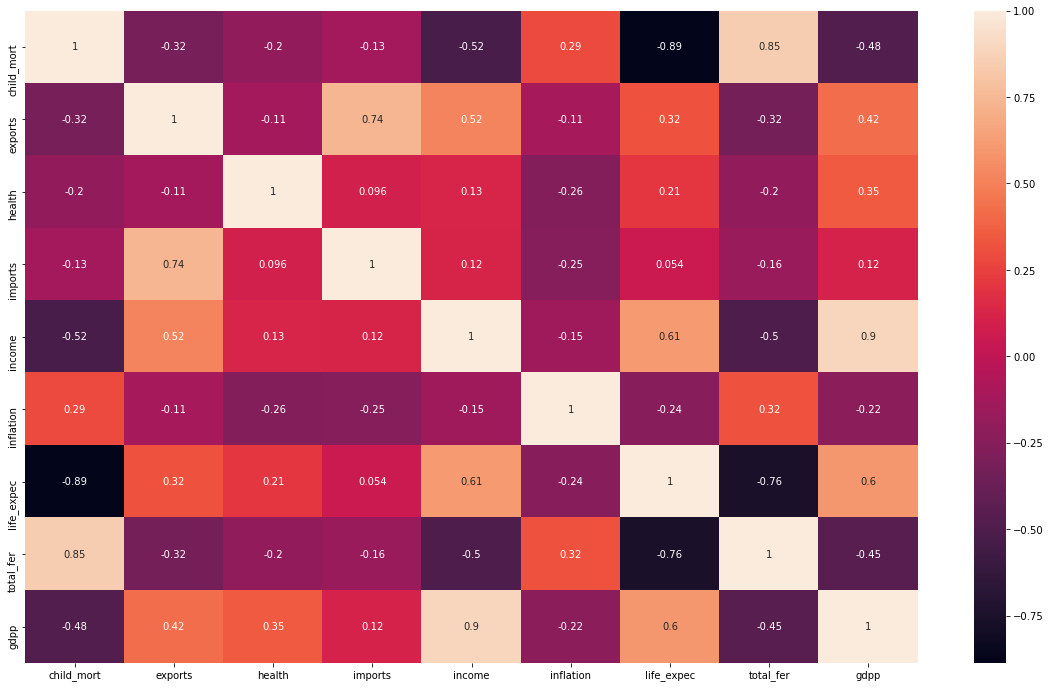

In [10]:
#Checking the correlation of the variables

plt.figure(figsize=(20,12))
sns.heatmap(df_countries.corr(),annot=True)
plt.show()

The correlation for child Mortality and Total fertialty shows higher which is 0.85 

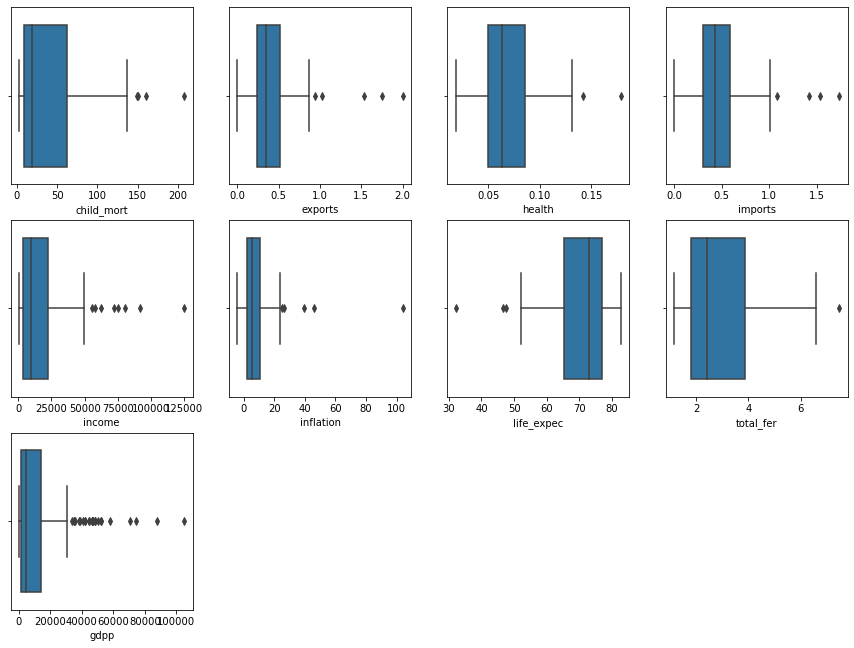

In [11]:
#Checking the OUTLIERS

plt.figure(figsize = (15,15))
feature = df_countries.columns[1:]
for i in enumerate(feature):
    plt.subplot(4,4, i[0]+1)
    sns.boxplot(df_countries[i[1]])

We see that child Mortality has upper range  outliers, GDPP has a more outliers which is rending to 1000000 And Income also has outliers but less than gdpp. These outliers to be minimised to carry out the further opeartions.

In [12]:
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,0.100,0.0758,0.449,1610,9.44,56.2,5.82,553
1,Albania,16.6,0.280,0.0655,0.486,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,0.384,0.0417,0.314,12900,16.10,76.5,2.89,4460
3,Angola,119.0,0.623,0.0285,0.429,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,0.455,0.0603,0.589,19100,1.44,76.8,2.13,12200


In [13]:
# Outliers capping is done for only required columns

q1_child = df_countries['child_mort'].quantile(0.05)
q4_child = df_countries['child_mort'].quantile(0.95)

q1_inc = df_countries['income'].quantile(0.05)
q4_inc= df_countries['income'].quantile(0.95)

q1_inc = df_countries['income'].quantile(0.05)
q4_gdp = df_countries['gdpp'].quantile(0.95)



df_countries['child_mort'][df_countries['child_mort']<= q1_child] = q1_child
df_countries['income'][df_countries['income']>= q4_inc] = q4_inc
df_countries['gdpp'][df_countries['gdpp']>= q4_gdp] = q4_gdp


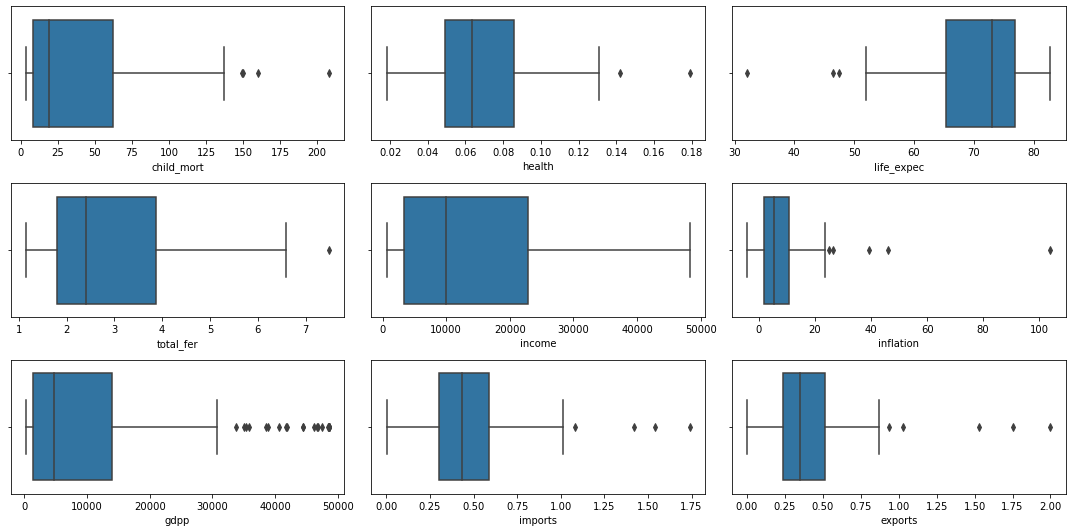

In [14]:

# After capping checking the outliers. Observe that there are still outliers after capping  But if using the range from 0c.25 to 0.75
# the outliers are being removed.However 0.25 to 0.75 is the hard range and shouldnt be used unless required .
# Here the 0.75 isnt required as per my analysis.

fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(df_countries['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df_countries['health'], ax = axs[0,1])
plt3 = sns.boxplot(df_countries['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df_countries['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df_countries['income'], ax = axs[1,1])
plt6 = sns.boxplot(df_countries['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df_countries['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df_countries['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df_countries['exports'], ax = axs[2,2])

plt.tight_layout()

# Clustering

In [15]:
# Check the hopkins

#Calculating the Hopkins statistic

 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [16]:
#Executed min 10 times, the average is more than 80%
hopkins(df_countries.drop('country', axis = 1))

0.9180723711640313

# Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1_countries = scaler.fit_transform(df_countries.drop('country', axis = 1))
df1_countries

array([[ 1.29160749, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.75736169],
       [-0.53981229, -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.52332107],
       [-0.27355969, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.49883845],
       ...,
       [-0.37309337,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.70727157],
       [ 0.44805952, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.70727157],
       [ 1.1149352 , -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.69734618]])

In [18]:
df1_countries = pd.DataFrame(df1_countries, columns = df_countries.columns[1:])
df1_countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291607,-1.138280,0.279088,-0.082455,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.539812,-0.479658,-0.097016,0.070837,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.273560,-0.099122,-0.966073,-0.641762,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.008250,0.775381,-1.448071,-0.165315,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.696578,0.160668,-0.286894,0.497568,0.227992,-0.601749,0.704258,-0.541946,0.013312


# K Means Clustering

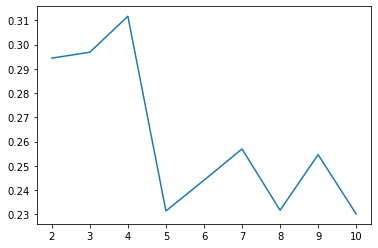

In [19]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1_countries)
    ss.append([k, silhouette_score(df1_countries, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

#From the above Kmeans, clusters can be taken as 3 

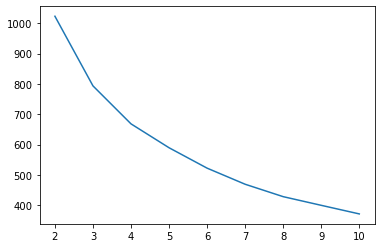

In [20]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1_countries)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

#Clusters from ssd also  proves that clusters can be considered as 3 

In [21]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1_countries)

KMeans(n_clusters=3, random_state=50)

In [22]:
df_kmean = df_countries.copy()

In [23]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


In [24]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,0.100,0.0758,0.449,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,0.280,0.0655,0.486,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,0.384,0.0417,0.314,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,0.623,0.0285,0.429,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,0.455,0.0603,0.589,19100.0,1.44,76.8,2.13,12200,0


In [25]:
df_kmean.label.value_counts()

0    83
2    45
1    39
Name: label, dtype: int64

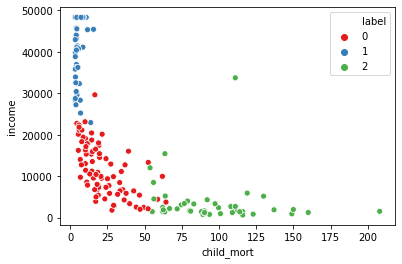

In [26]:
# Plot the cluster between child_mort ,income
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

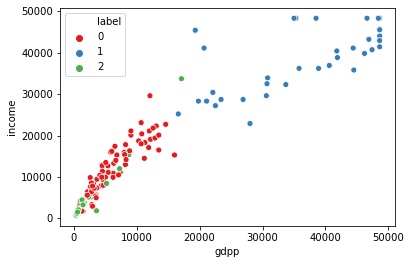

In [27]:
# Plot the cluster between gdpp,income
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

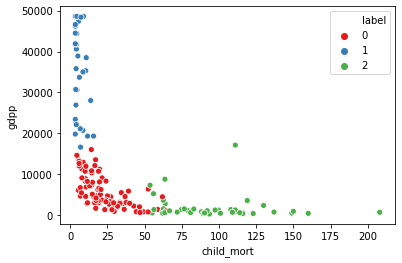

In [28]:
# Plot the cluster between child_mort,gdpp
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')

# Clustering Profile

In [29]:
df_kmean.drop('country',axis=1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,22.772289,0.399179,0.062969,0.476538,11398.433735,7.609506,72.478313,2.331928,5892.915663
1,5.772821,0.580744,0.085136,0.505538,39051.538462,3.296718,79.733333,1.815897,36799.743590
2,95.106667,0.286024,0.063011,0.423067,3539.844444,11.986778,59.055556,5.065333,1766.711111


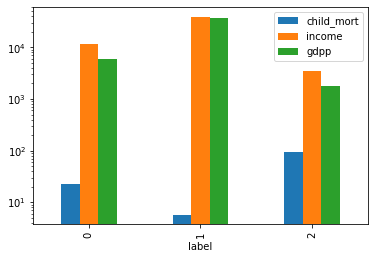

In [30]:
# GDP, INCOME AND CHID_MORT

df_kmean.drop(['exports', 'health', 'imports','inflation','life_expec','total_fer','country'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.yscale('log')

#As per above graph for Low income, Low GDP and High Child_mort cluster 2 is correct

In [31]:
# Low income, Low GDP and High Child_mort
# Filter the data for that cluster

df_kmean[df_kmean['label'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,0.1000,0.0758,0.449,1610.0,9.440,56.2,5.82,553,2
3,Angola,119.0,0.6230,0.0285,0.429,5900.0,22.400,60.1,6.16,3530,2
17,Benin,111.0,0.2380,0.0410,0.372,1820.0,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,0.1920,0.0674,0.296,1430.0,6.810,57.9,5.87,575,2
26,Burundi,93.6,0.0892,0.1160,0.392,764.0,12.300,57.7,6.26,231,2
28,Cameroon,108.0,0.2220,0.0513,0.270,2660.0,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,0.1180,0.0398,0.265,888.0,2.010,47.5,5.21,446,2
32,Chad,150.0,0.3680,0.0453,0.435,1930.0,6.390,56.5,6.59,897,2
36,Comoros,88.2,0.1650,0.0451,0.517,1410.0,3.870,65.9,4.75,769,2
37,"Congo, Dem. Rep.",116.0,0.4110,0.0791,0.496,609.0,20.800,57.5,6.54,334,2


In [32]:
df_kmean[df_kmean['label'] == 2].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,0.153,0.0691,0.647,1500.0,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,0.168,0.1310,0.345,1220.0,17.20,55.0,5.20,399,2
32,Chad,150.0,0.368,0.0453,0.435,1930.0,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,0.118,0.0398,0.265,888.0,2.01,47.5,5.21,446,2
97,Mali,137.0,0.228,0.0498,0.351,1870.0,4.37,59.5,6.55,708,2
113,Nigeria,130.0,0.253,0.0507,0.174,5150.0,104.00,60.5,5.84,2330,2
112,Niger,123.0,0.222,0.0516,0.491,814.0,2.55,58.8,7.49,348,2
3,Angola,119.0,0.623,0.0285,0.429,5900.0,22.40,60.1,6.16,3530,2
37,"Congo, Dem. Rep.",116.0,0.411,0.0791,0.496,609.0,20.80,57.5,6.54,334,2
25,Burkina Faso,116.0,0.192,0.0674,0.296,1430.0,6.81,57.9,5.87,575,2


## Hierarchical Clustering

In [33]:
df1_countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291607,-1.138280,0.279088,-0.082455,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.539812,-0.479658,-0.097016,0.070837,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.273560,-0.099122,-0.966073,-0.641762,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.008250,0.775381,-1.448071,-0.165315,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.696578,0.160668,-0.286894,0.497568,0.227992,-0.601749,0.704258,-0.541946,0.013312


In [34]:
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,0.100,0.0758,0.449,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,0.280,0.0655,0.486,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,0.384,0.0417,0.314,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,0.623,0.0285,0.429,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,0.455,0.0603,0.589,19100.0,1.44,76.8,2.13,12200,0


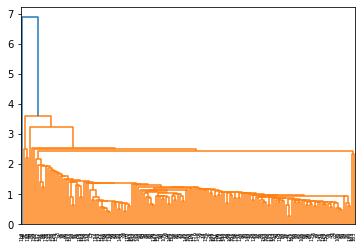

In [35]:
# single linkage
mergings = linkage(df1_countries, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

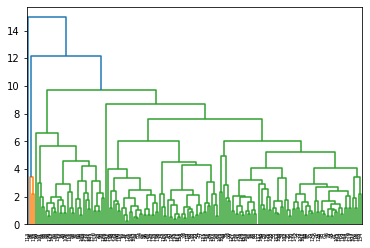

In [36]:
# complete linkage
mergings = linkage(df1_countries, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [37]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [38]:
# assign cluster labels
df_kmean['cluster_labels'] = cluster_labels
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,0.100,0.0758,0.449,1610.0,9.44,56.2,5.82,553,2,0
1,Albania,16.6,0.280,0.0655,0.486,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,0.384,0.0417,0.314,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,0.623,0.0285,0.429,5900.0,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,0.455,0.0603,0.589,19100.0,1.44,76.8,2.13,12200,0,1


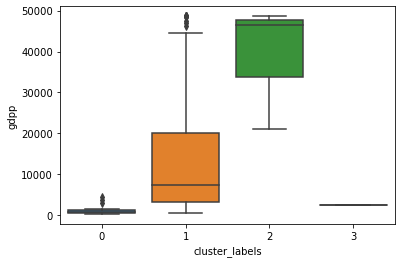

In [39]:
# plots for gdpp
sns.boxplot(x='cluster_labels', y='gdpp', data=df_kmean)

#From the above plot we can cluster 0 has  lowest  with  outliers , however cluster 1 is bit higher and cluster 2 highest

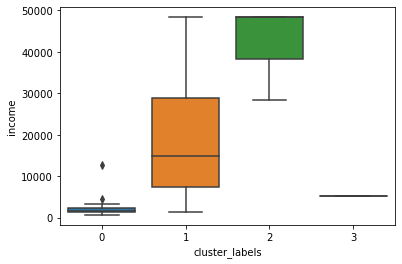

In [40]:
# plots for gdpp
sns.boxplot(x='cluster_labels', y='income', data=df_kmean)

#From the above plot we can cluster 0 has  lowest  with  outliers , however cluster 1 is bit higher and cluster 2 highest

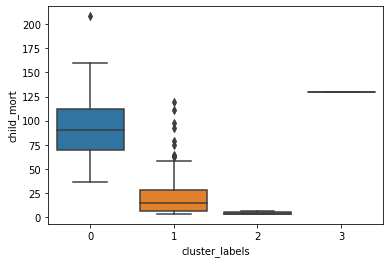

In [41]:
# plots for gdpp
sns.boxplot(x='cluster_labels', y='child_mort', data=df_kmean)

#From the above plot we can cluster 0 is high  and cluster 1 is bit higher with outliers

In [42]:
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,0.100,0.0758,0.449,1610.0,9.44,56.2,5.82,553,2,0
1,Albania,16.6,0.280,0.0655,0.486,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,0.384,0.0417,0.314,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,0.623,0.0285,0.429,5900.0,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,0.455,0.0603,0.589,19100.0,1.44,76.8,2.13,12200,0,1


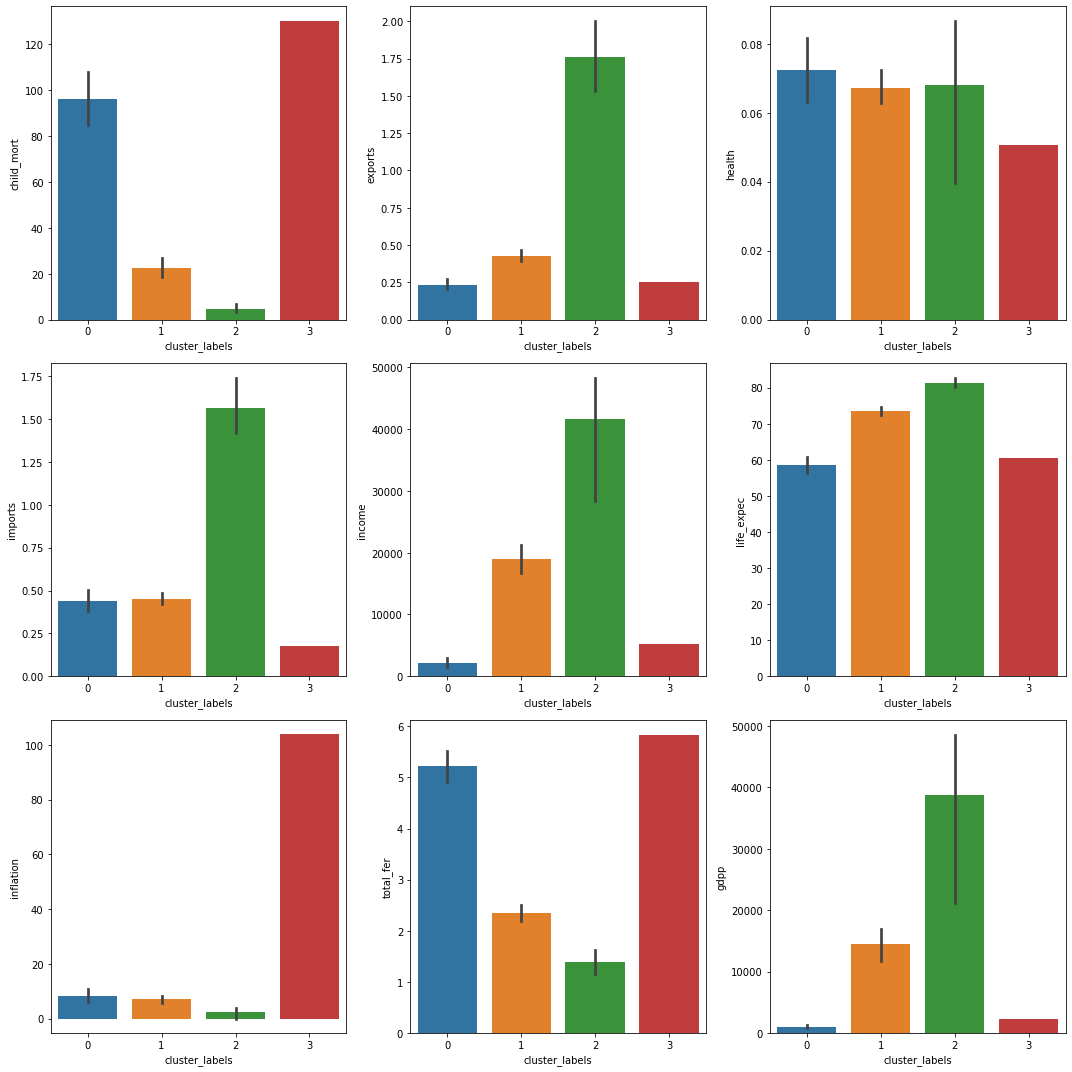

In [43]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df_kmean.cluster_labels, y=df_kmean.child_mort, ax = axs[0,0])
sns.barplot(x=df_kmean.cluster_labels, y=df_kmean.exports, ax = axs[0,1])
sns.barplot(x=df_kmean.cluster_labels, y=df_kmean.health, ax = axs[0,2])
sns.barplot(x=df_kmean.cluster_labels, y=df_kmean.imports, ax = axs[1,0])
sns.barplot(x=df_kmean.cluster_labels, y=df_kmean.income, ax = axs[1,1])
sns.barplot(x=df_kmean.cluster_labels, y=df_kmean.life_expec, ax = axs[1,2])
sns.barplot(x=df_kmean.cluster_labels, y=df_kmean.inflation, ax = axs[2,0])
sns.barplot(x=df_kmean.cluster_labels, y=df_kmean.total_fer, ax = axs[2,1])
sns.barplot(x=df_kmean.cluster_labels, y=df_kmean.gdpp, ax = axs[2,2])
plt.tight_layout()

#From the above plots we can see that child mortalioty rate is higher in cluster 2, Income is less in cluster 2 and GDPP is less in cluster 2

# Clustering Profile

In [44]:
df_kmean.drop('country',axis=1).groupby('cluster_labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
cluster_labels,,,,,,,,,,
0,96.031429,0.235291,0.072320,0.439686,2099.228571,8.402714,58.605714,5.219143,993.428571,1.885714
1,22.579844,0.428780,0.067160,0.453466,18944.296875,6.984898,73.646875,2.341094,14456.203125,0.453125
2,4.573333,1.760000,0.067933,1.566667,41626.666667,2.468000,81.433333,1.380000,38770.000000,1.000000
3,130.000000,0.253000,0.050700,0.174000,5150.000000,104.000000,60.500000,5.840000,2330.000000,2.000000


In [45]:
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,0.100,0.0758,0.449,1610.0,9.44,56.2,5.82,553,2,0
1,Albania,16.6,0.280,0.0655,0.486,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,0.384,0.0417,0.314,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,0.623,0.0285,0.429,5900.0,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,0.455,0.0603,0.589,19100.0,1.44,76.8,2.13,12200,0,1


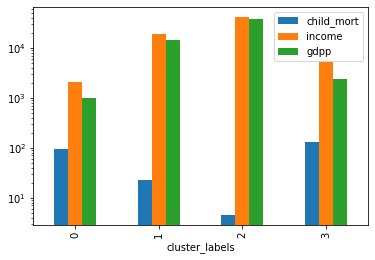

In [46]:
# GDP, INCOME AND CHID_MORT

df_kmean.drop(['exports', 'health', 'imports','inflation','life_expec','total_fer','country','label'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')
plt.yscale('log')

In [47]:
df_kmean[df_kmean['cluster_labels'] == 0].head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,0.1000,0.0758,0.449,1610.0,9.440,56.2,5.82,553,2,0
17,Benin,111.0,0.2380,0.0410,0.372,1820.0,0.885,61.8,5.36,758,2,0
25,Burkina Faso,116.0,0.1920,0.0674,0.296,1430.0,6.810,57.9,5.87,575,2,0
26,Burundi,93.6,0.0892,0.1160,0.392,764.0,12.300,57.7,6.26,231,2,0
28,Cameroon,108.0,0.2220,0.0513,0.270,2660.0,1.910,57.3,5.11,1310,2,0


In [48]:
df_kmean[df_kmean.cluster_labels == 0].sort_values(by = ['child_mort', 'income','gdpp'], ascending = [False, True,True]).head(10)



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
66,Haiti,208.0,0.153,0.0691,0.647,1500.0,5.450,32.1,3.33,662,2,0
132,Sierra Leone,160.0,0.168,0.1310,0.345,1220.0,17.200,55.0,5.20,399,2,0
32,Chad,150.0,0.368,0.0453,0.435,1930.0,6.390,56.5,6.59,897,2,0
31,Central African Republic,149.0,0.118,0.0398,0.265,888.0,2.010,47.5,5.21,446,2,0
97,Mali,137.0,0.228,0.0498,0.351,1870.0,4.370,59.5,6.55,708,2,0
112,Niger,123.0,0.222,0.0516,0.491,814.0,2.550,58.8,7.49,348,2,0
37,"Congo, Dem. Rep.",116.0,0.411,0.0791,0.496,609.0,20.800,57.5,6.54,334,2,0
25,Burkina Faso,116.0,0.192,0.0674,0.296,1430.0,6.810,57.9,5.87,575,2,0
64,Guinea-Bissau,114.0,0.149,0.0850,0.352,1390.0,2.970,55.6,5.05,547,2,0
17,Benin,111.0,0.238,0.0410,0.372,1820.0,0.885,61.8,5.36,758,2,0


# Conclusion

#From both K Means and Hierarichal clustering the following top 5 countries that  need help based on High child mortality rate, low income and low GDP.
1)Haiti

2)Sierra Leone

3)Chad

4)Central African Republic

5)Mali